In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('BostonHousing.csv')

In [3]:
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [5]:
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

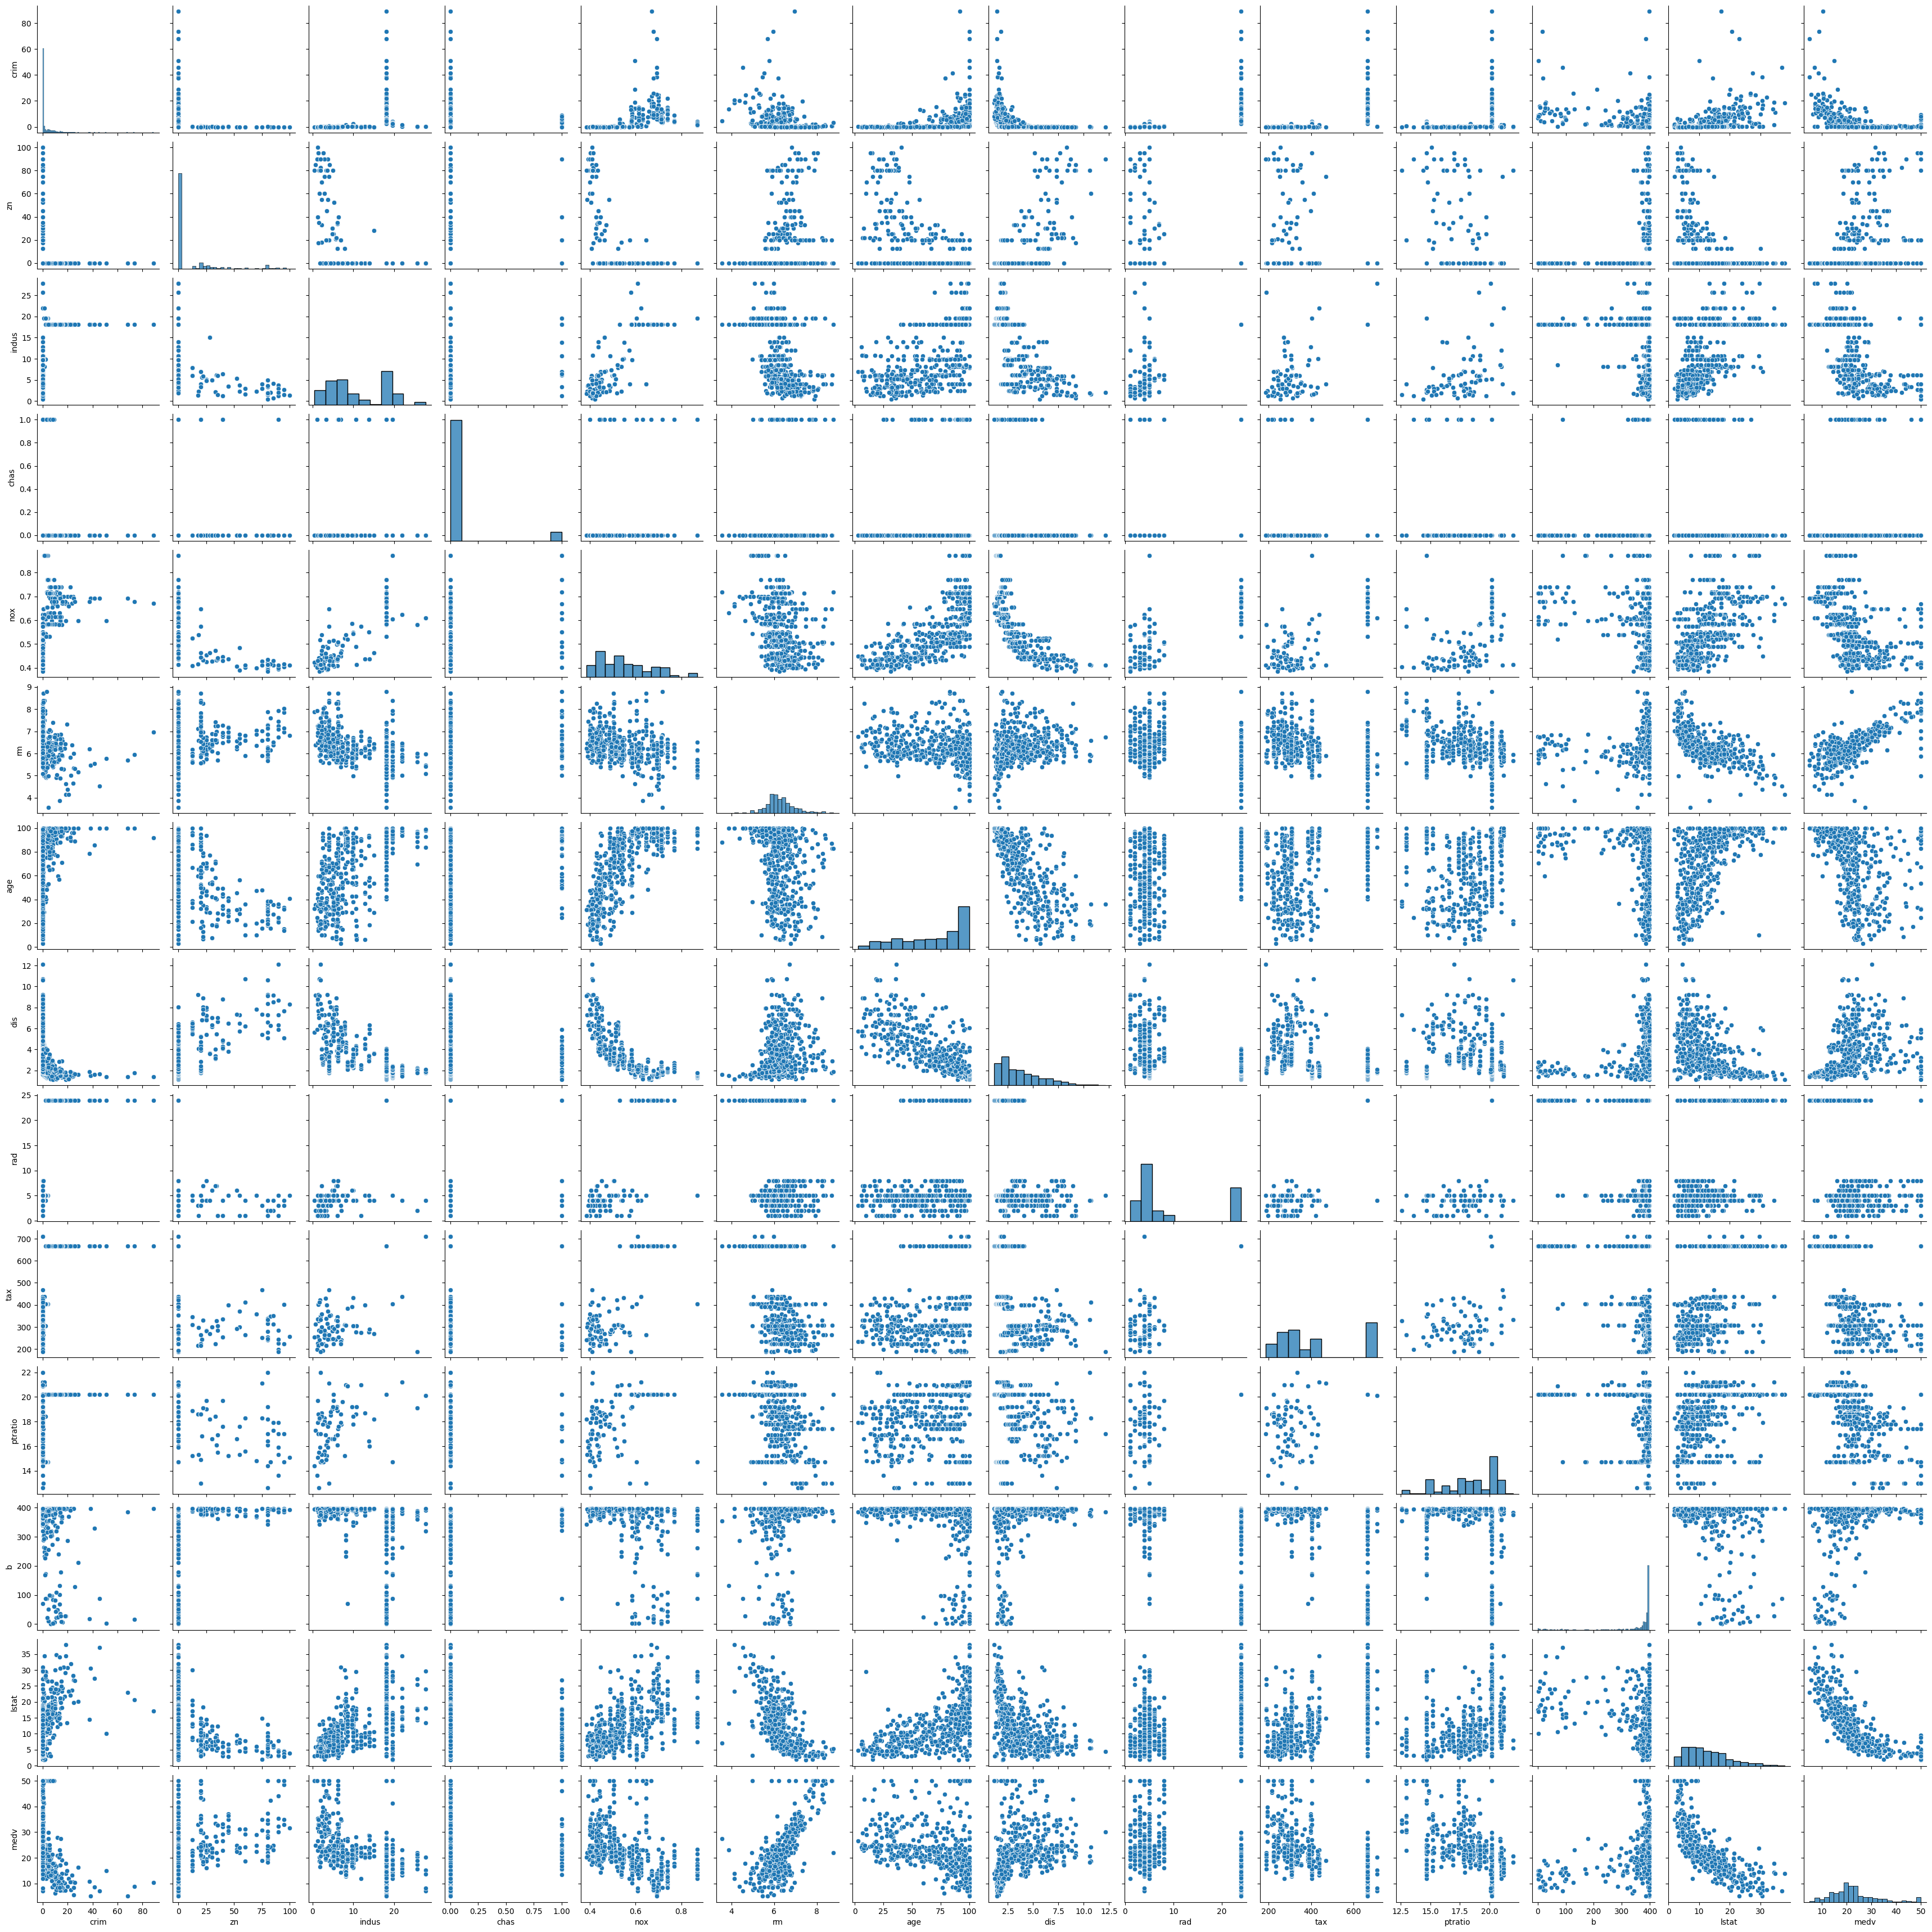

In [6]:
sns.pairplot(df)

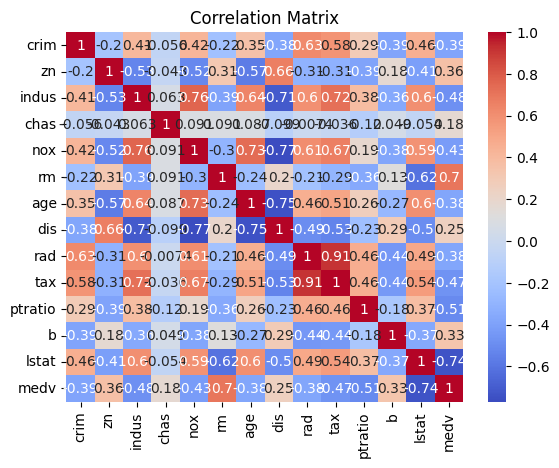

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
'''crim: Per capita crime rate by town.
zn: Proportion of large residential lots (over 25,000 sq. ft.).
indus: Proportion of non-retail business acres per town.
Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
nox: Concentration of nitrogen oxides in the air.
rm: Average number of rooms per dwelling.
age: Proportion of old owner-occupied units built before 1940.
dis: Weighted distances to Boston employment centers.
rad: Index of accessibility to radial highways.
tax: Property tax rate per $10,000.'''

'crim: Per capita crime rate by town.\nzn: Proportion of large residential lots (over 25,000 sq. ft.).\nindus: Proportion of non-retail business acres per town.\nChas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).\nnox: Concentration of nitrogen oxides in the air.\nrm: Average number of rooms per dwelling.\nage: Proportion of old owner-occupied units built before 1940.\ndis: Weighted distances to Boston employment centers.\nrad: Index of accessibility to radial highways.\ntax: Property tax rate per $10,000.'

In [12]:
X = df[['crim', 'zn', 'indus', 'chas', 'rm', 'age', 'rad', 'tax']]
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [16]:
model = LinearRegression()


model.fit(X_train_imputed, y_train)

LinearRegression()

In [18]:
# Model Evaluation
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 36.00271825001501
R-squared: 0.5090568534926727


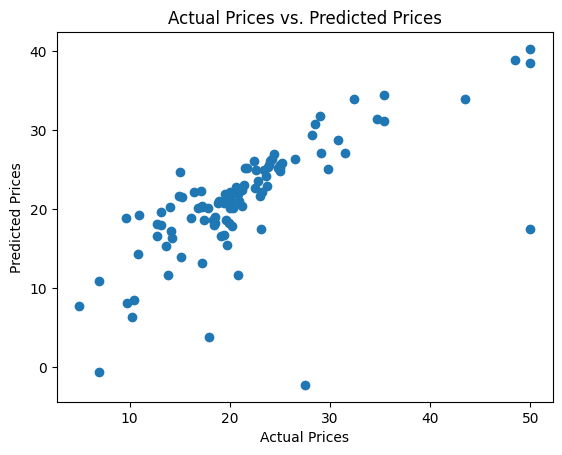

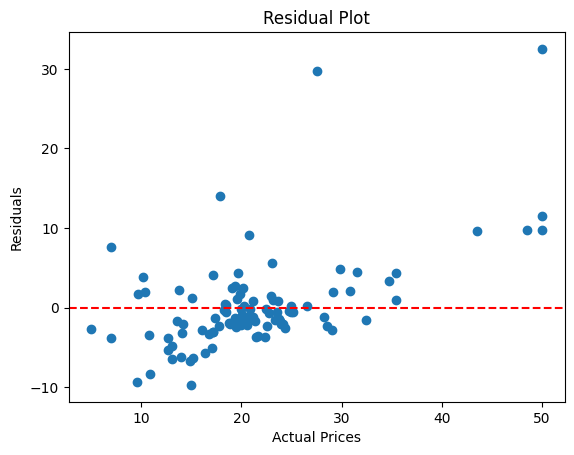

Predicted Price: 18689.516055716376


In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

In [ ]:
'''Linear regression is a powerful machine learning algorithm that can be applied to predict house prices accurately.
By gathering and preprocessing relevant data, building and fine-tuning the model, and evaluating its performance, we can develop a valuable tool for 
the real estate industry.
As technology advances further, machine learning models like linear regression continue to transform the way we make decisions, turning data into 
meaningful insights for a better future.'''

